# **About the dataset**.

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 

It is a sample of binary classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.


In [93]:
import numpy as np 
import pandas as pd

In [94]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv'
df = pd.read_csv(url)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Since certain columns are categorical variables, we need to change that to float or int, we'll use the get_dummies function.

In [95]:
dfCholesterol = pd.get_dummies(df['Cholesterol'])
dfSex = pd.get_dummies(df['Sex'])
dfBP = pd.get_dummies(df['BP'])
df_new = df

In [96]:
df_new = pd.concat([df_new,dfCholesterol,dfSex,dfBP], axis = 1)
df_new

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,HIGH,NORMAL,F,M,HIGH,LOW,NORMAL
0,23,F,HIGH,HIGH,25.355,drugY,1,0,1,0,1,0,0
1,47,M,LOW,HIGH,13.093,drugC,1,0,0,1,0,1,0
2,47,M,LOW,HIGH,10.114,drugC,1,0,0,1,0,1,0
3,28,F,NORMAL,HIGH,7.798,drugX,1,0,1,0,0,0,1
4,61,F,LOW,HIGH,18.043,drugY,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,1,0,1,0,0,1,0
196,16,M,LOW,HIGH,12.006,drugC,1,0,0,1,0,1,0
197,52,M,NORMAL,HIGH,9.894,drugX,1,0,0,1,0,0,1
198,23,M,NORMAL,NORMAL,14.020,drugX,0,1,0,1,0,0,1


In [97]:
df_new.drop(columns = ['Sex','BP','Cholesterol'], inplace = True)
df_new

,Age,Na_to_K,Drug,HIGH,NORMAL,F,M,HIGH,LOW,NORMAL
0,23,25.355,drugY,1,0,1,0,1,0,0
1,47,13.093,drugC,1,0,0,1,0,1,0
2,47,10.114,drugC,1,0,0,1,0,1,0
3,28,7.798,drugX,1,0,1,0,0,0,1
4,61,18.043,drugY,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,drugC,1,0,1,0,0,1,0
196,16,12.006,drugC,1,0,0,1,0,1,0
197,52,9.894,drugX,1,0,0,1,0,0,1
198,23,14.020,drugX,0,1,0,1,0,0,1


In [99]:
X = np.asanyarray(df_new[['Age','Na_to_K','HIGH','NORMAL','F','M','HIGH','LOW','NORMAL']])
X

array([[23.   , 25.355,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [47.   , 13.093,  1.   , ...,  1.   ,  0.   ,  0.   ],
       [47.   , 10.114,  1.   , ...,  1.   ,  0.   ,  0.   ],
       ...,
       [52.   ,  9.894,  1.   , ...,  0.   ,  0.   ,  1.   ],
       [23.   , 14.02 ,  0.   , ...,  0.   ,  1.   ,  1.   ],
       [40.   , 11.349,  0.   , ...,  1.   ,  1.   ,  0.   ]])

In [100]:
Y = np.asanyarray(df_new[['Drug']])
Y[:5]

array([['drugY'],
       ['drugC'],
       ['drugC'],
       ['drugX'],
       ['drugY']], dtype=object)

In [101]:
from sklearn.model_selection import train_test_split # Splitting into test & train data
xtrainset, xtestset, ytrainset, ytestset = train_test_split(X, Y, test_size=0.2, random_state=5)
print("Train data ",xtrainset.shape, ytrainset.shape)
print("Test data ",xtestset.shape, ytestset.shape)


Train data  (160, 13) (160, 1)
Test data  (40, 13) (40, 1)


In [102]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
drugtree = DecisionTreeClassifier(criterion="entropy", max_depth = 4) # Fitting our model
drugtree.fit(xtrainset,ytrainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [115]:
predTree = drugtree.predict(xtestset) # Predicting using out model
print(predTree[:11])
print(ytestset[:11])

['drugY' 'drugY' 'drugX' 'drugC' 'drugY' 'drugB' 'drugY' 'drugY' 'drugY'
 'drugY' 'drugY']
[['drugY']
 ['drugY']
 ['drugX']
 ['drugC']
 ['drugY']
 ['drugB']
 ['drugY']
 ['drugY']
 ['drugY']
 ['drugY']
 ['drugY']]


In [105]:
from sklearn import metrics # Evaluation
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(ytestset, predTree))

DecisionTrees's Accuracy:  1.0


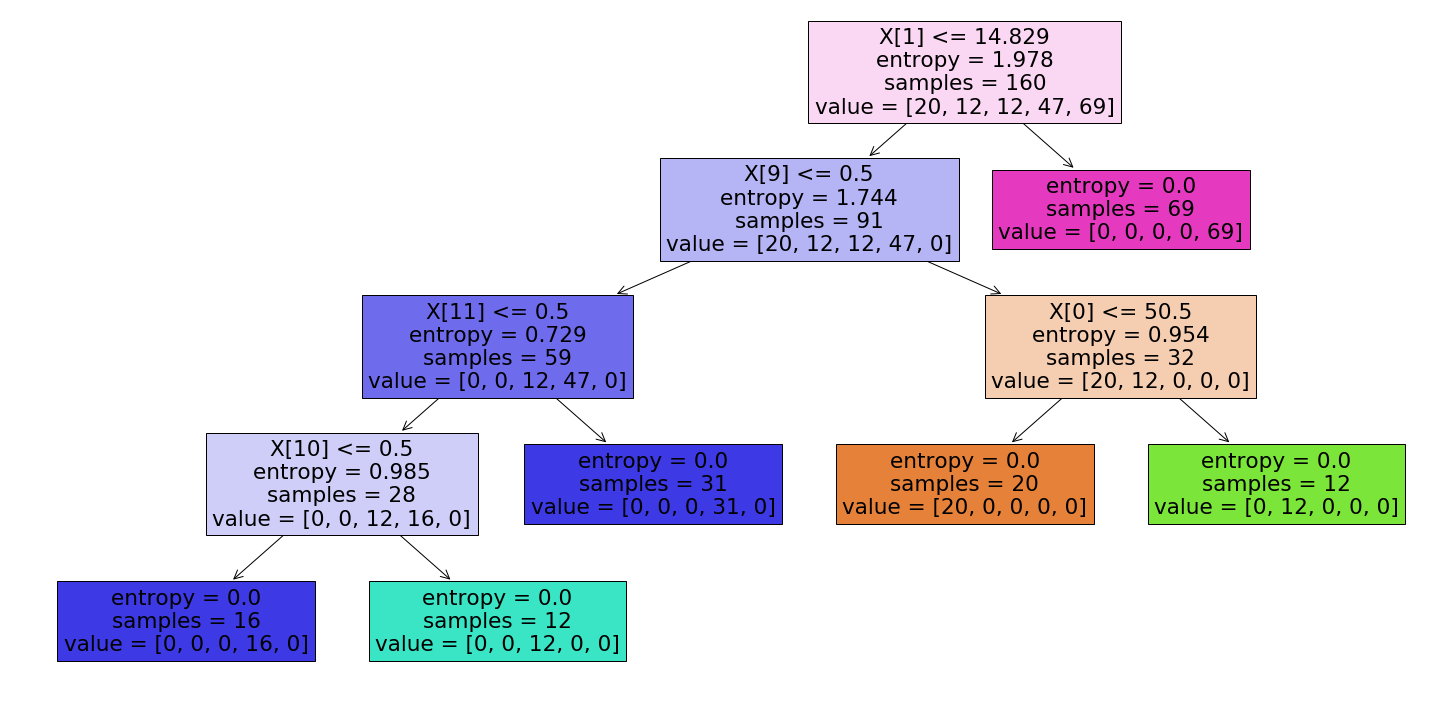

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,12.5))
plot_tree(drugtree.fit(xtrainset,ytrainset), filled=True)
plt.show()